In [1]:
import pandas as pd 
import pip._vendor.requests as requests
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from  sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
scope1 = "user-library-read"


In [2]:
df_total = pd.read_csv("total.csv")
df_total
df_total.loc[df_total["tag"] == "calm", "tag"] = 0
df_total.loc[df_total["tag"] == "happy", "tag"] = 1
df_total.loc[df_total["tag"] == "energ", "tag"] = 2
df_total.loc[df_total["tag"] == "sad", "tag"] = 3

In [3]:
df_calm = pd.read_csv("soft_mix.csv")
df_calm = df_calm.drop(columns=['Spotify ID', 'Artist IDs', 'Track Name', 'Album Name', 'Artist Name(s)', 'Release Date', 
                                'Duration (ms)', 'Genres', 'Popularity', 'Added By', 'Added At', 'Mode', 'Time Signature'])
df_calm["tag"]=0


df_energ = pd.read_csv("hype_workout_mix.csv")
df_energ = df_energ.drop(columns=['Spotify ID', 'Artist IDs', 'Track Name', 'Album Name', 'Artist Name(s)', 'Release Date', 
                                'Duration (ms)', 'Genres', 'Popularity', 'Added By', 'Added At', 'Mode', 'Time Signature'])
df_energ["tag"]=2

df_happy = pd.read_csv("feel_good_happy_mix.csv")
df_happy = df_happy.drop(columns=['Spotify ID', 'Artist IDs', 'Track Name', 'Album Name', 'Artist Name(s)', 'Release Date', 
                                'Duration (ms)', 'Genres', 'Popularity', 'Added By', 'Added At', 'Mode', 'Time Signature'])
df_happy["tag"]=1

df_sad = pd.read_csv("lonely_sad_mix.csv")
df_sad = df_sad.drop(columns=['Spotify ID', 'Artist IDs', 'Track Name', 'Album Name', 'Artist Name(s)', 'Release Date', 
                                'Duration (ms)', 'Genres', 'Popularity', 'Added By', 'Added At', 'Mode', 'Time Signature'])
df_sad["tag"]=3

In [4]:
min_value = df_calm[["Tempo"]].min()
max_value = df_calm[["Tempo"]].max()
df_calm["Tempo"] = (df_calm[["Tempo"]] - min_value) / (max_value - min_value)

min_value = df_calm[["Loudness"]].min()
max_value = df_calm[["Loudness"]].max()
df_calm["Loudness"] = (df_calm[["Loudness"]] - min_value) / (max_value - min_value)

min_value = df_calm[["Key"]].min()
max_value = df_calm[["Key"]].max()
df_calm["Key"] = (df_calm[["Key"]] - min_value) / (max_value - min_value)



min_value = df_energ[["Tempo"]].min()
max_value = df_energ[["Tempo"]].max()
df_energ["Tempo"] = (df_energ[["Tempo"]] - min_value) / (max_value - min_value)

min_value = df_energ[["Loudness"]].min()
max_value = df_energ[["Loudness"]].max()
df_energ["Loudness"] = (df_energ[["Loudness"]] - min_value) / (max_value - min_value)

min_value = df_energ[["Key"]].min()
max_value = df_energ[["Key"]].max()
df_energ["Key"] = (df_energ[["Key"]] - min_value) / (max_value - min_value)



min_value = df_happy[["Tempo"]].min()
max_value = df_happy[["Tempo"]].max()
df_happy["Tempo"] = (df_happy[["Tempo"]] - min_value) / (max_value - min_value)

min_value = df_happy[["Loudness"]].min()
max_value = df_happy[["Loudness"]].max()
df_happy["Loudness"] = (df_happy[["Loudness"]] - min_value) / (max_value - min_value)

min_value = df_happy[["Key"]].min()
max_value = df_happy[["Key"]].max()
df_happy["Key"] = (df_happy[["Key"]] - min_value) / (max_value - min_value)



min_value = df_sad[["Tempo"]].min()
max_value = df_sad[["Tempo"]].max()
df_sad["Tempo"] = (df_sad[["Tempo"]] - min_value) / (max_value - min_value)

min_value = df_sad[["Loudness"]].min()
max_value = df_sad[["Loudness"]].max()
df_sad["Loudness"] = (df_sad[["Loudness"]] - min_value) / (max_value - min_value)

min_value = df_sad[["Key"]].min()
max_value = df_sad[["Key"]].max()
df_sad["Key"] = (df_sad[["Key"]] - min_value) / (max_value - min_value)

In [7]:
# Normalize the DataFrame to be between 0 and 1
min_value = df_total[["Tempo"]].min()
max_value = df_total[["Tempo"]].max()
df_total["Tempo"] = (df_total[["Tempo"]] - min_value) / (max_value - min_value)

min_value = df_total[["Loudness"]].min()
max_value = df_total[["Loudness"]].max()
df_total["Loudness"] = (df_total[["Loudness"]] - min_value) / (max_value - min_value)

min_value = df_total[["Key"]].min()
max_value = df_total[["Key"]].max()
df_total["Key"] = (df_total[["Key"]] - min_value) / (max_value - min_value)


data = df_total[["Danceability", "Energy", "Key", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo"]]
data_target = df_total[["tag"]].astype(int)

data_calm = df_calm[["Danceability", "Energy", "Key", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo"]]
data_calm_target = df_calm[["tag"]].astype(int)

AttributeError: 'DataFrame' object has no attribute 'array'

In [6]:
song_x_train, song_x_test, song_y_train, song_y_test = train_test_split(data, data_target, test_size= 0.2, random_state= 42, shuffle=True)
df_result = []

for i in range(1):
    model = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes= (16, 10,), activation= "logistic",max_iter= 1000, learning_rate_init= 0.01, alpha = 0.01), n_jobs = -1)
    data_calm = np.ravel(data_calm)
    data_calm_target = np.ravel(data_calm_target)
    model.fit(song_x_train,song_y_train)
    data_predict = model.predict(data_calm)
    output = {"RMSE": np.sqrt(mean_squared_error(data_calm_target,data_predict)), "accuracy_score":metrics.accuracy_score(data_calm_target, data_predict)}
    df_result.append(output)
        # print("RMSE", np.sqrt(mean_squared_error(song_y_test,song_y_predict)))
        # print(metrics.accuracy_score(song_y_test, song_y_predict))
        # print("------")
df_output = pd.DataFrame(df_result)
df_output

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0.502      0.168      0.         0.61230469 0.0355     0.969
 0.971      0.111      0.158      0.93137047 0.27       0.188
 0.8        0.4499783  0.0404     0.978      0.97       0.109
 0.085      0.29919486 0.547      0.193      0.5        0.65798611
 0.0386     0.953      0.735      0.191      0.221      1.
 0.531      0.211      0.5        0.60177951 0.0361     0.928
 0.797      0.0939     0.206      0.17820033 0.515      0.132
 0.5        0.35145399 0.0372     0.962      0.939      0.109
 0.143      0.         0.542      0.0817     0.         0.23860677
 0.0384     0.93       0.235      0.108      0.288      0.36761284
 0.483      0.167      0.5        0.72070312 0.0341     0.936
 0.9        0.0863     0.169      0.59541557 0.255      0.0745
 0.         0.17469618 0.0395     0.863      0.128      0.133
 0.179      0.33854329 0.418      0.153      0.8        0.25119358
 0.0352     0.956      0.903      0.096      0.0627     0.98407148
 0.513      0.259      0.2        0.96169705 0.0315     0.918
 0.807      0.107      0.107      0.36273473 0.563      0.148
 0.8        0.359375   0.0398     0.873      0.772      0.101
 0.1        0.92244801 0.374      0.0765     0.5        0.19965278
 0.0341     0.989      0.954      0.165      0.11       0.70532237
 0.392      0.175      0.2        0.28559028 0.0349     0.986
 0.866      0.125      0.259      0.73082044 0.392      0.162
 0.         0.35872396 0.0421     0.979      0.745      0.124
 0.189      0.58392962 0.544      0.203      1.         0.63161892
 0.0419     0.946      0.314      0.103      0.251      0.79927575
 0.557      0.16       1.         0.54253472 0.0401     0.96
 0.886      0.0926     0.0577     0.92916786 0.406      0.0835
 0.4        0.         0.0322     0.965      0.156      0.209
 0.109      0.52001643 0.386      0.164      0.9        0.57845052
 0.0334     0.911      0.319      0.0847     0.0672     0.40360134
 0.59       0.135      0.5        0.57519531 0.0455     0.973
 0.839      0.112      0.359      0.8974477  0.342      0.202
 1.         0.55718316 0.0415     0.947      0.67       0.119
 0.292      0.09516047 0.455      0.26       0.         0.74012587
 0.0385     0.973      0.946      0.26       0.204      0.96348884
 0.41       0.138      0.6        0.30707465 0.0317     0.961
 0.893      0.234      0.0812     0.46934382 0.557      0.229
 0.7        0.5921224  0.0359     0.853      0.423      0.0984
 0.0816     0.16335445 0.516      0.159      0.5        0.67415365
 0.0377     0.972      0.895      0.0856     0.196      0.83404472
 0.442      0.174      0.         0.33626302 0.032      0.941
 0.85       0.11       0.129      0.67385109 0.615      0.186
 0.8        0.5766059  0.0494     0.96       0.888      0.351
 0.195      0.87952812 0.526      0.152      0.7        0.53786892
 0.0373     0.951      0.888      0.123      0.144      0.81550293
 0.345      0.133      0.2        0.33485243 0.0331     0.949
 0.559      0.0804     0.0744     0.37764283 0.552      0.113
 0.5        0.22276476 0.0371     0.964      0.672      0.123
 0.207      0.19007205 0.364      0.187      0.2        0.26356337
 0.0329     0.979      0.915      0.0832     0.0902     0.41360644
 0.54       0.176      0.2        0.72938368 0.0383     0.961
 0.0187     0.139      0.279      0.75904379 0.511      0.274
 0.5        1.         0.0357     0.952      0.679      0.112
 0.118      0.25911223 0.561      0.133      0.2        0.50889757
 0.0436     0.959      0.938      0.135      0.181      0.76857602
 0.458      0.0922     0.5        0.07486979 0.0373     0.952
 0.756      0.106      0.112      0.79887754 0.51       0.134
 0.7        0.21885851 0.0334     0.932      0.956      0.375
 0.182      0.62245673 0.609      0.147      0.4        0.64105903
 0.0459     0.967      0.924      0.0971     0.109      0.91067584
 0.453      0.203      0.7        0.78266059 0.0362     0.976
 0.904      0.116      0.197      0.78312323 0.445      0.21
 0.6        0.47667101 0.034      0.969      0.973      0.101
 0.182      0.05374631 0.474      0.172      0.5        0.51898872
 0.037      0.953      0.949      0.106      0.116      0.8041663
 0.437      0.0956     0.7        0.51258681 0.0315     0.982
 0.296      0.135      0.16       0.66797745 0.467      0.0856
 1.         0.12261285 0.0346     0.903      0.647      0.143
 0.115      0.39699349 0.518      0.147      1.         0.52734375
 0.038      0.954      0.976      0.123      0.161      0.77110218
 0.552      0.0863     0.7        0.28374566 0.0316     0.934
 0.982      0.126      0.188      0.1239438  0.615      0.195
 0.1        0.44802517 0.0339     0.979      0.907      0.264
 0.172      0.03313879 0.352      0.233      0.         0.60026042
 0.0405     0.933      0.924      0.0966     0.159      0.81091104
 0.414      0.154      0.         0.38953993 0.0442     0.973
 0.892      0.107      0.119      0.85015991 0.526      0.131
 0.         0.42740885 0.0368     0.947      0.853      0.349
 0.176      0.79913886 0.538      0.161      0.         0.68945312
 0.0518     0.982      0.296      0.291      0.21       0.90646972
 0.55       0.151      0.3        0.42133247 0.0347     0.97
 0.865      0.111      0.106      0.82374096 0.632      0.481
 0.6        0.62044271 0.0611     0.199      0.763      0.112
 0.229      0.76500454].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

(array([ 0.69687476,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.39374951,  1.39374951,  2.78749902,  3.48437378,
         6.2718728 ,  3.48437378,  8.36249707,  9.75624658, 11.14999609,
        12.5437456 , 11.84687085, 20.20936791, 20.20936791, 27.17811547,
        37.6312368 , 34.14686302, 27.87499022, 36.23748729, 26.48124071,
        50.87185716, 28.57186498, 37.6312368 , 36.93436205, 30.66248925,
        32.75311351, 31.359364  , 23.69374169, 22.29999218, 20.90624267,
        12.5437456 , 13.24062036, 16.02811938,  8.36249707,  6.96874756,
         5.57499804,  5.57499804,  4.18124853,  0.69687476,  1.39374951,
         0.        ,  0.69687476,  0.69687476,  1.39374951,  0.69687476]),
 array([0.66261867, 0.66405364, 0.66548862, 0.6669236 , 0.66835858,
        0.66979356, 0.67122853, 0.67266351, 0.67409849, 0.67553347,
        0.67696845, 0.67840343, 0.6798384 , 0.68127338, 0.68270836,
        0.68414334, 0.68557832, 0.68701329, 0.68844827, 0.689883

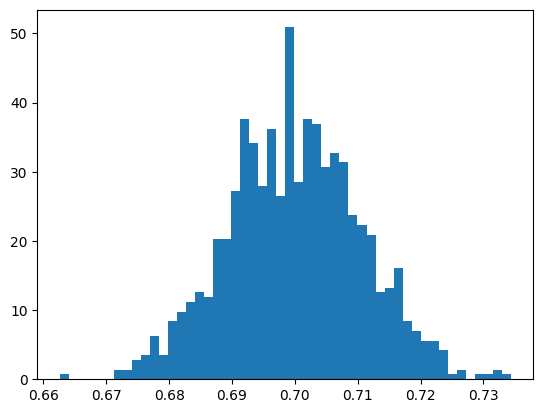

In [ ]:
mean = df_output["accuracy_score"].mean()
std = df_output["accuracy_score"].std()
normal = np.random.normal(mean, std, size = len(df_output))
plt.hist(normal, bins = 50, density= True)

In [ ]:
song_y_test_copy = [0] * song_y_test.size
song_y_predict_copy = [0] * song_y_predict.size

for i in range(song_y_test.size):
    song_y_test_copy[i] = song_y_test[i]
for i in range(song_y_predict.size):
    song_y_predict_copy[i] = song_y_predict[i]

for i in range(data_predict.size):
    if song_y_test_copy[i] == 0:
        song_y_test_copy[i] = 'calm'
    if song_y_test_copy[i] == 1:
        song_y_test_copy[i] = 'happy'
    if song_y_test_copy[i] == 2:
        song_y_test_copy[i] = 'energ'
    if song_y_test_copy[i] == 3:
        song_y_test_copy[i] = 'sad'

for i in range(data_predict.size):
    if song_y_predict_copy[i] == 0:
        song_y_predict_copy[i] = 'calm'
    if song_y_predict_copy[i] == 1:
        song_y_predict_copy[i] = 'happy'
    if song_y_predict_copy[i] == 2:
        song_y_predict_copy[i] = 'energ'
    if song_y_predict_copy[i] == 3:
        song_y_predict_copy[i] = 'sad'

compare = pd.DataFrame({'mood': song_y_test_copy, 'predicted': song_y_predict_copy})
compare

,mood,predicted
0,sad,sad
1,calm,calm
2,calm,calm
3,energ,sad
4,calm,calm
...,...,...
296,calm,calm
297,happy,energ
298,calm,calm
299,calm,calm
